In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
%matplotlib inline
sns.set()

## split data 

from sklearn.model_selection import train_test_split

## preprocessing

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

## models

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb


## accuracy to model

from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error,mean_absolute_error

## tuning for data 

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

## ANN
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

2024-08-01 22:05:35.033276: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-01 22:05:35.033419: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-01 22:05:35.193750: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
df=pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
df.head(12).style.background_gradient(cmap="rainbow")

/opt/conda/lib/python3.10/site-packages/pandas/io/formats/style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/opt/conda/lib/python3.10/site-packages/pandas/io/formats/style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990000,10.380000,122.800000,1001.000000,0.118400,0.277600,0.300100,0.147100,0.241900,0.078710,1.095000,0.905300,8.589000,153.400000,0.006399,0.049040,0.053730,0.015870,0.030030,0.006193,25.380000,17.330000,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.460100,0.118900,nan
1,842517,M,20.570000,17.770000,132.900000,1326.000000,0.084740,0.078640,0.086900,0.070170,0.181200,0.056670,0.543500,0.733900,3.398000,74.080000,0.005225,0.013080,0.018600,0.013400,0.013890,0.003532,24.990000,23.410000,158.800000,1956.000000,0.123800,0.186600,0.241600,0.186000,0.275000,0.089020,nan
2,84300903,M,19.690000,21.250000,130.000000,1203.000000,0.109600,0.159900,0.197400,0.127900,0.206900,0.059990,0.745600,0.786900,4.585000,94.030000,0.006150,0.040060,0.038320,0.020580,0.022500,0.004571,23.570000,25.530000,152.500000,1709.000000,0.144400,0.424500,0.450400,0.243000,0.361300,0.087580,nan
3,84348301,M,11.420000,20.380000,77.580000,386.100000,0.142500,0.283900,0.241400,0.105200,0.259700,0.097440,0.495600,1.156000,3.445000,27.230000,0.009110,0.074580,0.056610,0.018670,0.059630,0.009208,14.910000,26.500000,98.870000,567.700000,0.209800,0.866300,0.686900,0.257500,0.663800,0.173000,nan
4,84358402,M,20.290000,14.340000,135.100000,1297.000000,0.100300,0.132800,0.198000,0.104300,0.180900,0.058830,0.757200,0.781300,5.438000,94.440000,0.011490,0.024610,0.056880,0.018850,0.017560,0.005115,22.540000,16.670000,152.200000,1575.000000,0.137400,0.205000,0.400000,0.162500,0.236400,0.076780,nan
5,843786,M,12.450000,15.700000,82.570000,477.100000,0.127800,0.170000,0.157800,0.080890,0.208700,0.076130,0.334500,0.890200,2.217000,27.190000,0.007510,0.033450,0.036720,0.011370,0.021650,0.005082,15.470000,23.750000,103.400000,741.600000,0.179100,0.524900,0.535500,0.174100,0.398500,0.124400,nan
6,844359,M,18.250000,19.980000,119.600000,1040.000000,0.094630,0.109000,0.112700,0.074000,0.179400,0.057420,0.446700,0.773200,3.180000,53.910000,0.004314,0.013820,0.022540,0.010390,0.013690,0.002179,22.880000,27.660000,153.200000,1606.000000,0.144200,0.257600,0.378400,0.193200,0.306300,0.083680,nan
7,84458202,M,13.710000,20.830000,90.200000,577.900000,0.118900,0.164500,0.093660,0.059850,0.219600,0.074510,0.583500,1.377000,3.856000,50.960000,0.008805,0.030290,0.024880,0.014480,0.014860,0.005412,17.060000,28.140000,110.600000,897.000000,0.165400,0.368200,0.267800,0.155600,0.319600,0.115100,nan
8,844981,M,13.000000,21.820000,87.500000,519.800000,0.127300,0.193200,0.185900,0.093530,0.235000,0.073890,0.306300,1.002000,2.406000,24.320000,0.005731,0.035020,0.035530,0.012260,0.021430,0.003749,15.490000,30.730000,106.200000,739.300000,0.170300,0.540100,0.539000,0.206000,0.437800,0.107200,nan
9,84501001,M,12.460000,24.040000,83.970000,475.900000,0.118600,0.239600,0.227300,0.085430,0.203000,0.082430,0.297600,1.599000,2.039000,23.940000,0.007149,0.072170,0.077430,0.014320,0.017890,0.010080,15.090000,40.680000,97.650000,711.400000,0.185300,1.058000,1.105000,0.221000,0.436600,0.207500,nan


In [6]:
df.tail(22)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
547,922840,B,10.260,16.58,65.85,320.8,0.08877,0.08066,0.043580,0.024380,...,22.04,71.08,357.4,0.14610,0.22460,0.17830,0.08333,0.2691,0.09479,NaN
548,923169,B,9.683,19.34,61.05,285.7,0.08491,0.05030,0.023370,0.009615,...,25.59,69.10,364.2,0.11990,0.09546,0.09350,0.03846,0.2552,0.07920,NaN
549,923465,B,10.820,24.21,68.89,361.6,0.08192,0.06602,0.015480,0.008160,...,31.45,83.90,505.6,0.12040,0.16330,0.06194,0.03264,0.3059,0.07626,NaN
550,923748,B,10.860,21.48,68.51,360.5,0.07431,0.04227,0.000000,0.000000,...,24.77,74.08,412.3,0.10010,0.07348,0.00000,0.00000,0.2458,0.06592,NaN
551,923780,B,11.130,22.44,71.49,378.4,0.09566,0.08194,0.048240,0.022570,...,28.26,77.80,436.6,0.10870,0.17820,0.15640,0.06413,0.3169,0.08032,NaN
552,924084,B,12.770,29.43,81.35,507.9,0.08276,0.04234,0.019970,0.014990,...,36.00,88.10,594.7,0.12340,0.10640,0.08653,0.06498,0.2407,0.06484,NaN
553,924342,B,9.333,21.94,59.01,264.0,0.09240,0.05605,0.039960,0.012820,...,25.05,62.86,295.8,0.11030,0.08298,0.07993,0.02564,0.2435,0.07393,NaN
554,924632,B,12.880,28.92,82.50,514.3,0.08123,0.05824,0.061950,0.023430,...,35.74,88.84,595.7,0.12270,0.16200,0.24390,0.06493,0.2372,0.07242,NaN
555,924934,B,10.290,27.61,65.67,321.4,0.09030,0.07658,0.059990,0.027380,...,34.91,69.57,357.6,0.13840,0.17100,0.20000,0.09127,0.2226,0.08283,NaN
556,924964,B,10.160,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.011160,...,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742,NaN


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [8]:
df.describe(include="object")

,diagnosis
count,569
unique,2
top,B
freq,357


In [9]:
df.corr(numeric_only=True)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,NaN


In [10]:
df.shape

(569, 33)

In [11]:
df.sample(19)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
36,854268,M,14.250,21.72,93.63,633.0,0.09823,0.10980,0.131900,0.055980,...,30.36,116.20,799.6,0.14460,0.42380,0.518600,0.14470,0.3591,0.10140,NaN
404,904969,B,12.340,14.95,78.29,469.1,0.08682,0.04571,0.021090,0.020540,...,16.85,84.11,533.1,0.10480,0.06744,0.049210,0.04793,0.2298,0.05974,NaN
199,877500,M,14.450,20.22,94.49,642.7,0.09872,0.12060,0.118000,0.059800,...,30.12,117.90,1044.0,0.15520,0.40560,0.496700,0.18380,0.4753,0.10130,NaN
418,906024,B,12.700,12.17,80.88,495.0,0.08785,0.05794,0.023600,0.024020,...,16.92,88.12,566.9,0.13140,0.16070,0.093850,0.08224,0.2775,0.09464,NaN
204,87930,B,12.470,18.60,81.09,481.9,0.09965,0.10580,0.080050,0.038210,...,24.64,96.05,677.9,0.14260,0.23780,0.267100,0.10150,0.3014,0.08750,NaN
61,858981,B,8.598,20.98,54.66,221.8,0.12430,0.08963,0.030000,0.009259,...,27.04,62.06,273.9,0.16390,0.16980,0.090010,0.02778,0.2972,0.07712,NaN
322,894855,B,12.860,13.32,82.82,504.8,0.11340,0.08834,0.038000,0.034000,...,21.08,92.80,599.5,0.15470,0.22310,0.179100,0.11550,0.2382,0.08553,NaN
333,897137,B,11.250,14.78,71.38,390.0,0.08306,0.04458,0.000974,0.002941,...,22.06,82.08,492.7,0.11660,0.09794,0.005518,0.01667,0.2815,0.07418,NaN
121,86517,M,18.660,17.12,121.40,1077.0,0.10540,0.11000,0.145700,0.086650,...,24.90,145.40,1549.0,0.15030,0.22910,0.327200,0.16740,0.2894,0.08456,NaN
130,866714,B,12.190,13.29,79.08,455.8,0.10660,0.09509,0.028550,0.028820,...,17.81,91.38,545.2,0.14270,0.25850,0.099150,0.08187,0.3469,0.09241,NaN


In [12]:
df["area_mean"].value_counts()

area_mean
512.2     3
1075.0    2
582.7     2
399.8     2
641.2     2
         ..
507.4     1
609.9     1
463.7     1
428.9     1
181.0     1
Name: count, Length: 539, dtype: int64

In [13]:
df.groupby("texture_mean")["area_mean"].max()

texture_mean
9.71      357.6
10.38    1001.0
10.72     409.1
10.82     403.3
10.89     640.7
          ...  
31.12    1419.0
32.47    1223.0
33.56     744.9
33.81     386.8
39.28     920.6
Name: area_mean, Length: 479, dtype: float64

In [14]:
df["id"].sort_values(ascending=False).head(21)

464    911320502
463    911320501
461    911296202
460    911296201
449    911157302
360    901034302
359    901034301
213    881094802
210    881046502
151    871001502
150    871001501
536     91979701
533     91930402
532     91903902
531     91903901
527     91813702
526     91813701
521     91762702
514     91594602
507     91544002
506     91544001
Name: id, dtype: int64

In [15]:
df["texture_mean"].min()

9.71

In [16]:
df[df["area_worst"]==df["area_mean"]].sum()

id                          9665836
diagnosis                        MM
radius_mean                    43.1
texture_mean                  43.67
perimeter_mean               284.04
area_mean                    3197.8
smoothness_mean             0.20807
compactness_mean            0.20291
concavity_mean              0.34408
concave points_mean         0.18849
symmetry_mean                0.3213
fractal_dimension_mean      0.11029
radius_se                     4.087
texture_se                    3.664
perimeter_se                 30.057
area_se                       631.6
smoothness_se              0.020333
compactness_se              0.03866
concavity_se                0.08207
concave points_se           0.03324
symmetry_se                0.055712
fractal_dimension_se        0.00623
radius_worst                   43.1
texture_worst                 43.67
perimeter_worst              284.04
area_worst                   3197.8
smoothness_worst            0.20807
compactness_worst           

In [17]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

In [18]:
df["radius_mean"].unique

<bound method Series.unique of 0      17.99
1      20.57
2      19.69
3      11.42
4      20.29
       ...  
564    21.56
565    20.13
566    16.60
567    20.60
568     7.76
Name: radius_mean, Length: 569, dtype: float64>

In [19]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [20]:
df_corr=df.corr(numeric_only=True)[["radius_se","texture_se"]]
df_corr

,radius_se,texture_se
id,0.143048,-0.007526
radius_mean,0.679090,-0.097317
texture_mean,0.275869,0.386358
perimeter_mean,0.691765,-0.086761
area_mean,0.732562,-0.066280
smoothness_mean,0.301467,0.068406
compactness_mean,0.497473,0.046205
concavity_mean,0.631925,0.076218
concave points_mean,0.698050,0.021480
symmetry_mean,0.303379,0.128053


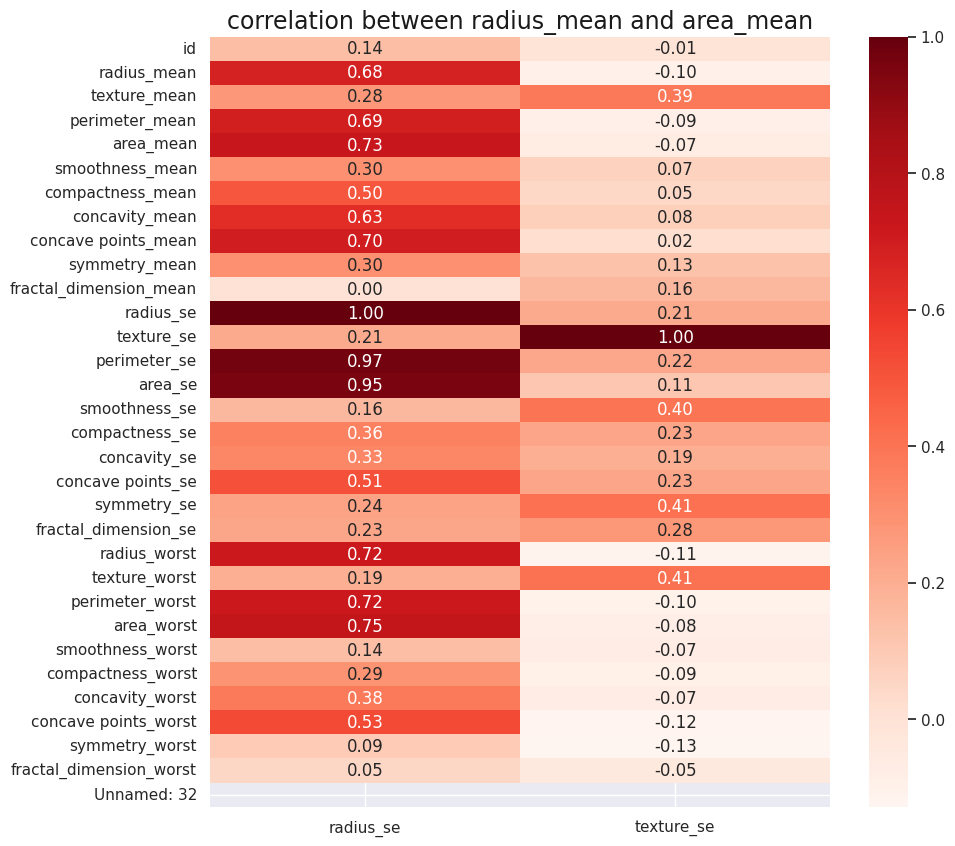

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(df_corr,annot=True,fmt=".2f",cmap="Reds")
plt.title("correlation between radius_mean and area_mean",fontsize=17,c="k")
plt.show()

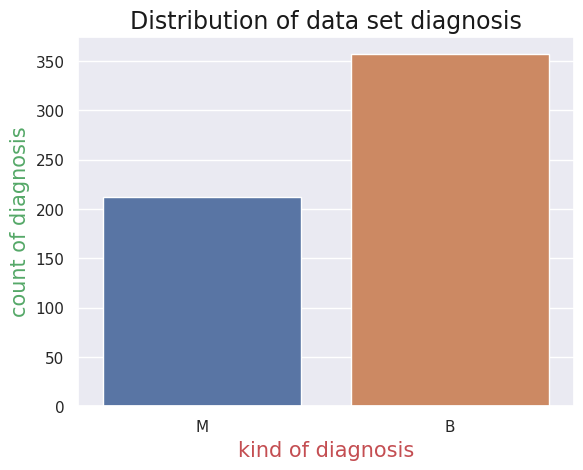

In [22]:
sns.countplot(x="diagnosis",data=df)
plt.title("Distribution of data set diagnosis",fontsize=17,c="k")
plt.xlabel("kind of diagnosis",fontsize=15,c="r")
plt.ylabel("count of diagnosis",fontsize=15,c="g")
plt.show()

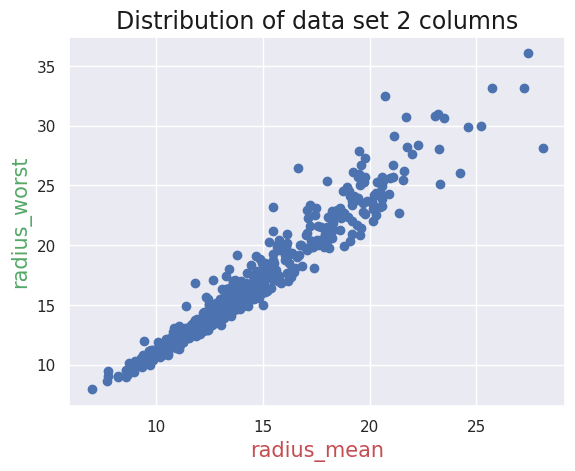

In [23]:
plt.scatter(x=df["radius_mean"],y=df["radius_worst"],c="b")
plt.title("Distribution of data set 2 columns",fontsize=17,c="k")
plt.xlabel("radius_mean",fontsize=15,c="r")
plt.ylabel("radius_worst",fontsize=15,c="g")
plt.show()

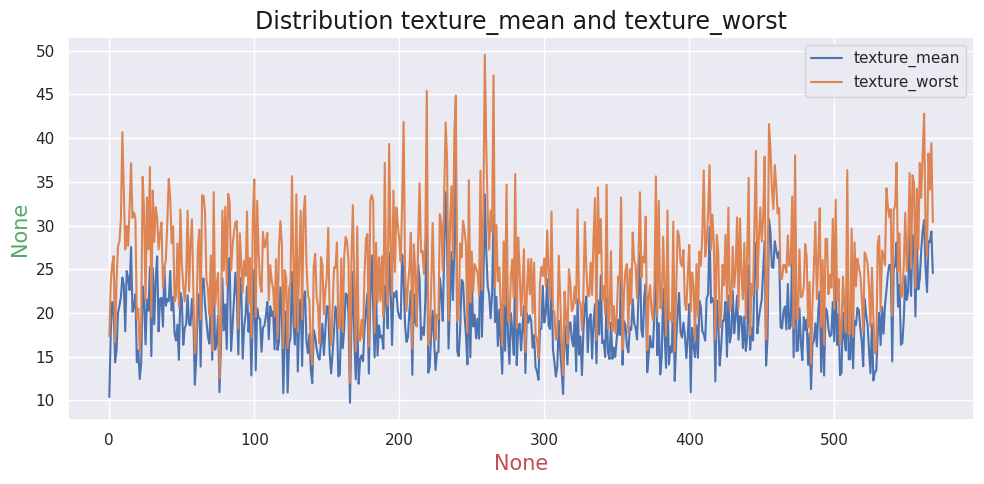

In [24]:
plt.figure(figsize=(10,5))
df["texture_mean"].plot()
df["texture_worst"].plot()
plt.title("Distribution texture_mean and texture_worst",fontsize=17,c="k")
plt.xlabel("None",fontsize=15,c="r")
plt.ylabel("None",fontsize=15,c="g")
plt.legend(["texture_mean","texture_worst"])
plt.tight_layout()
plt.show()


/tmp/ipykernel_33/222673665.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["radius_mean"])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


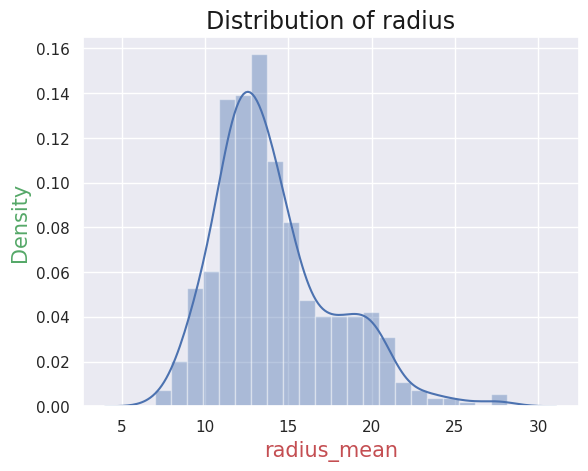

In [25]:
sns.distplot(df["radius_mean"])
plt.title("Distribution of radius",fontsize=17,c="k")
plt.xlabel("radius_mean",fontsize=15,c="r")
plt.ylabel("Density",fontsize=15,c="g")
plt.show()


/tmp/ipykernel_33/3140457752.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["radius_worst"],kde=False,color="r")


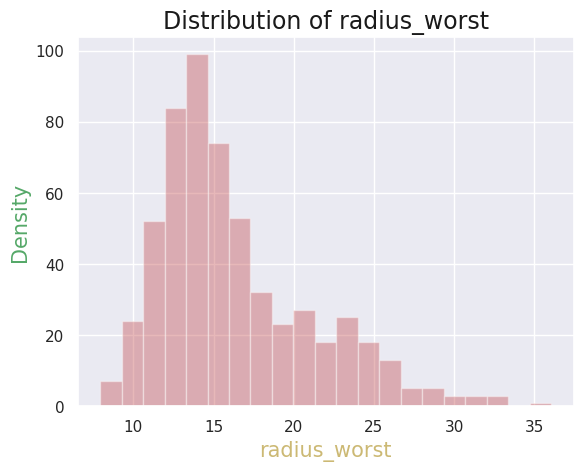

In [26]:
sns.distplot(df["radius_worst"],kde=False,color="r")
plt.title("Distribution of radius_worst",fontsize=17,c="k")
plt.xlabel("radius_worst",fontsize=15,c="y")
plt.ylabel("Density",fontsize=15,c="g")
plt.show()


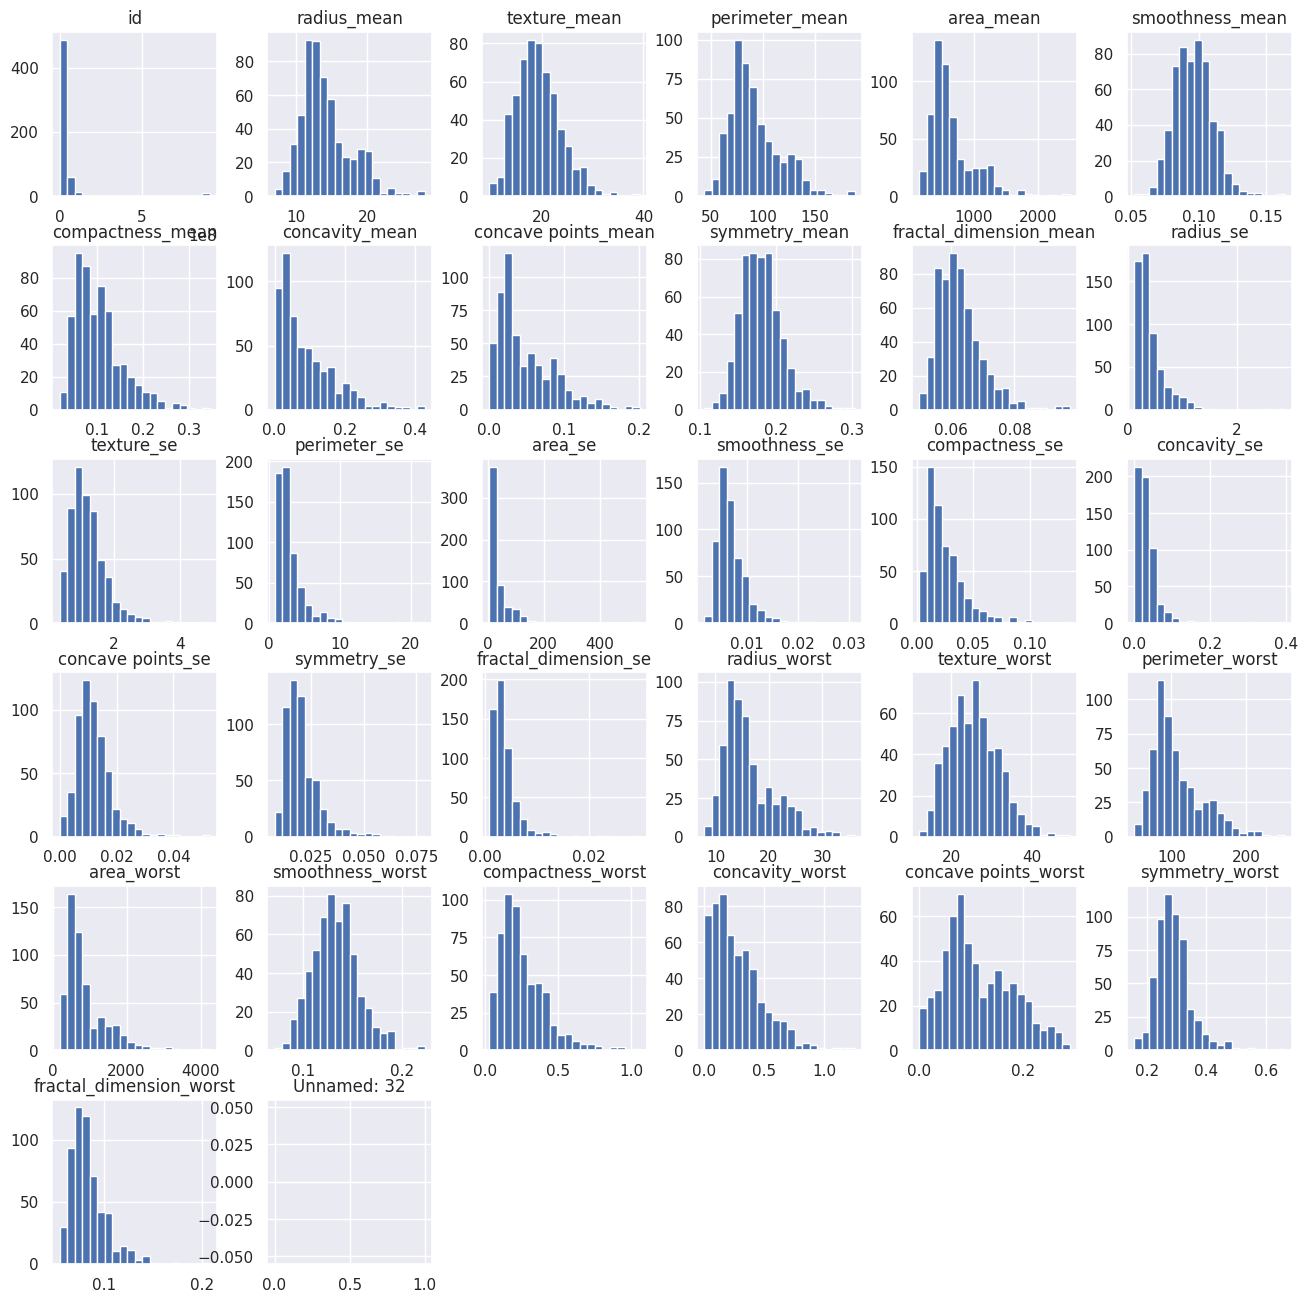

In [27]:
df.hist(bins=20,figsize=(16,16))
plt.show()

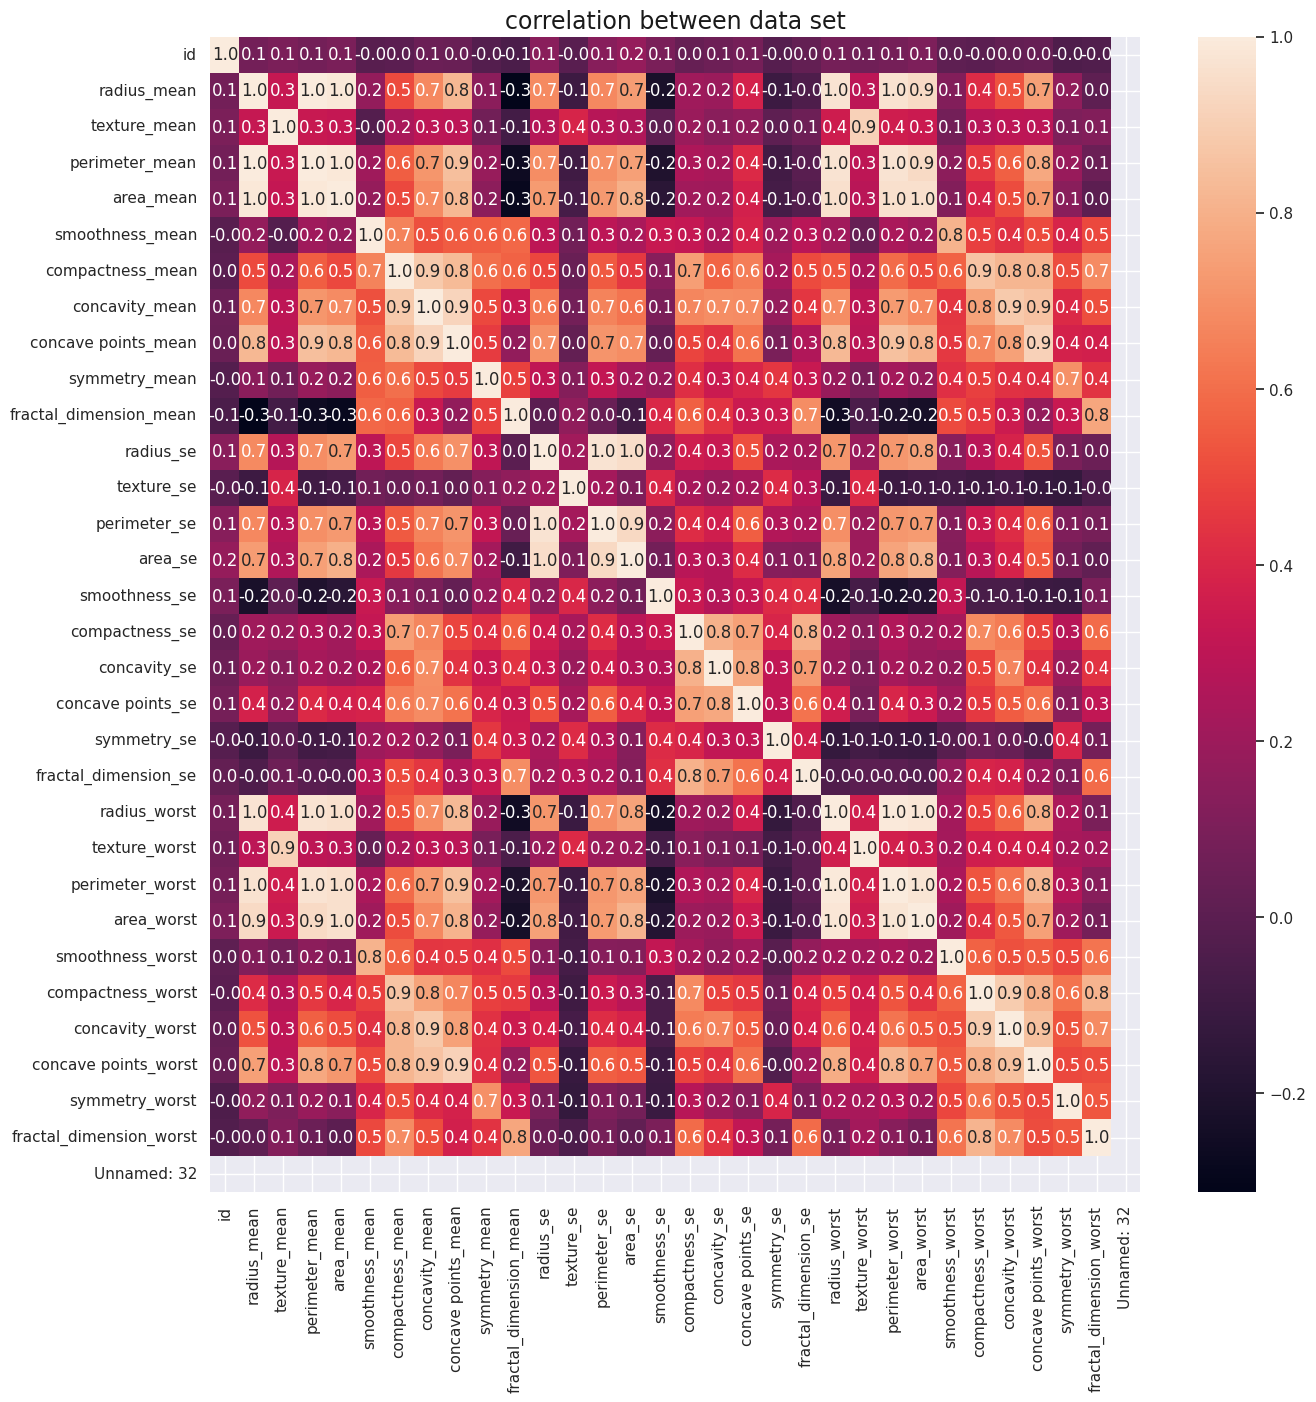

In [28]:
plt.figure(figsize=(15,15))
c=df.corr(numeric_only=True)
sns.heatmap(c,annot=True,fmt=".1f")
plt.title("correlation between data set",fontsize=17,c="k")
plt.show()

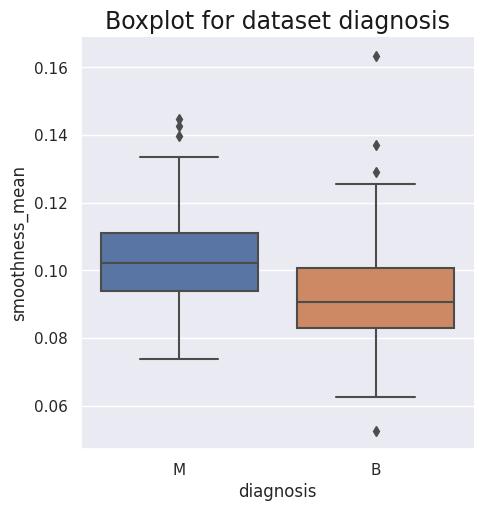

In [29]:
sns.catplot(x="diagnosis",y="smoothness_mean",data=df,kind="box")
plt.title("Boxplot for dataset diagnosis",fontsize=17,c="k")
plt.show()


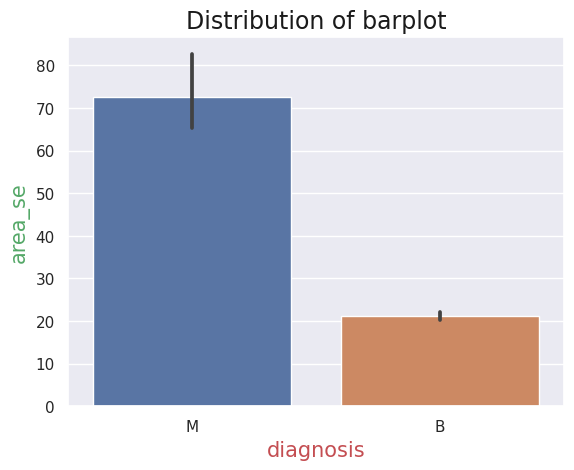

In [30]:
sns.barplot(data=df,x="diagnosis",y="area_se")
plt.title("Distribution of barplot",fontsize=17,c="k")
plt.xlabel("diagnosis",fontsize=15,c="r")
plt.ylabel("area_se",fontsize=15,c="g")
plt.show()




/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


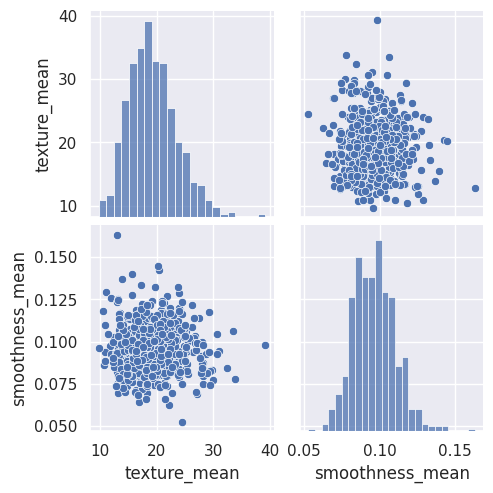

In [31]:
sns.pairplot(df,vars=["texture_mean","smoothness_mean"])
plt.show()

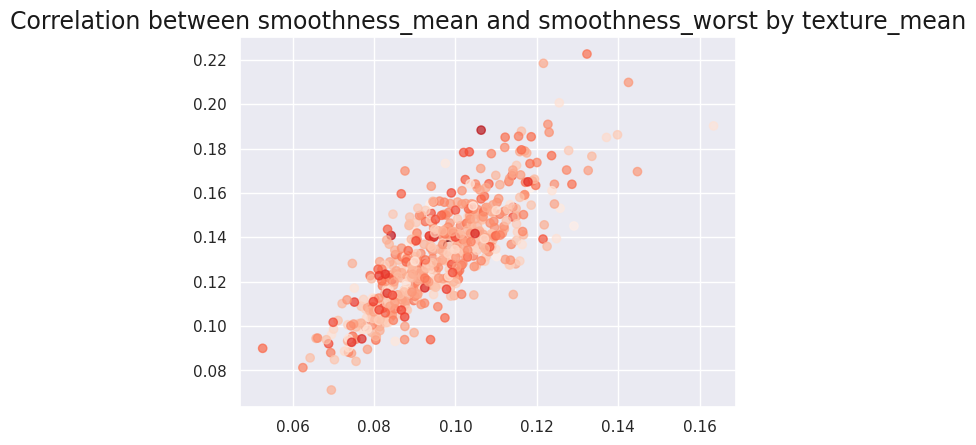

In [32]:
plt.scatter(x=df["smoothness_mean"],y=df["smoothness_worst"]
            ,cmap=plt.get_cmap("Reds"),c=df["texture_mean"],alpha=0.7)
plt.title("Correlation between smoothness_mean and smoothness_worst by texture_mean",fontsize=17,c="k")
plt.show()

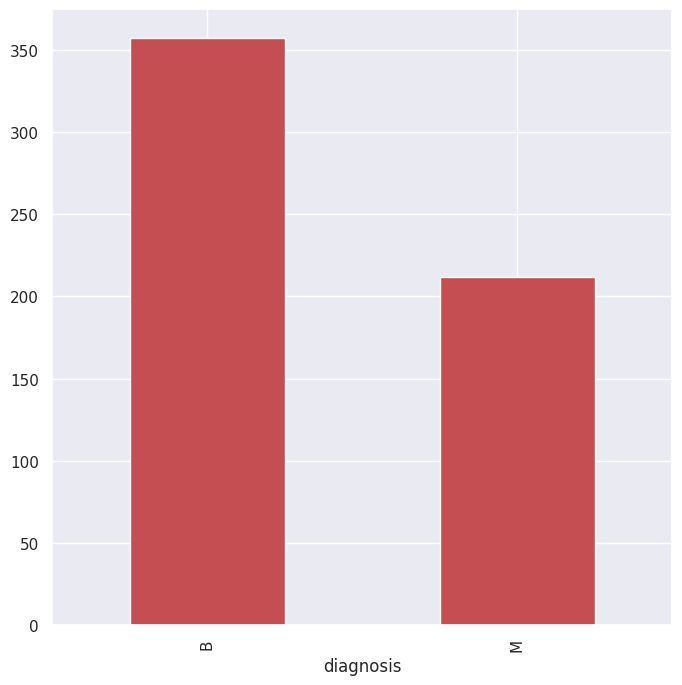

In [33]:
plt.figure(figsize=(8,8))
df.diagnosis.value_counts().plot(kind="bar",color="r")
plt.show()

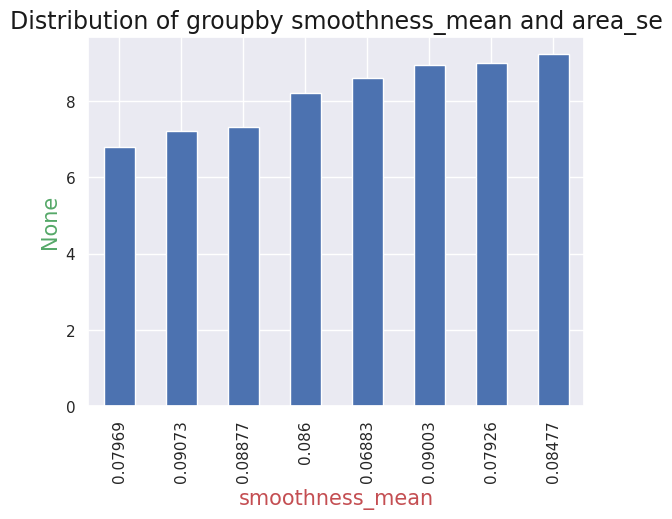

In [34]:
df.groupby("smoothness_mean")["area_se"].mean().sort_values().head(8).plot(kind="bar")
plt.title("Distribution of groupby smoothness_mean and area_se",fontsize=17,c="k")
plt.xlabel("smoothness_mean",fontsize=15,c="r")
plt.ylabel("None",fontsize=15,c="g")
plt.show()


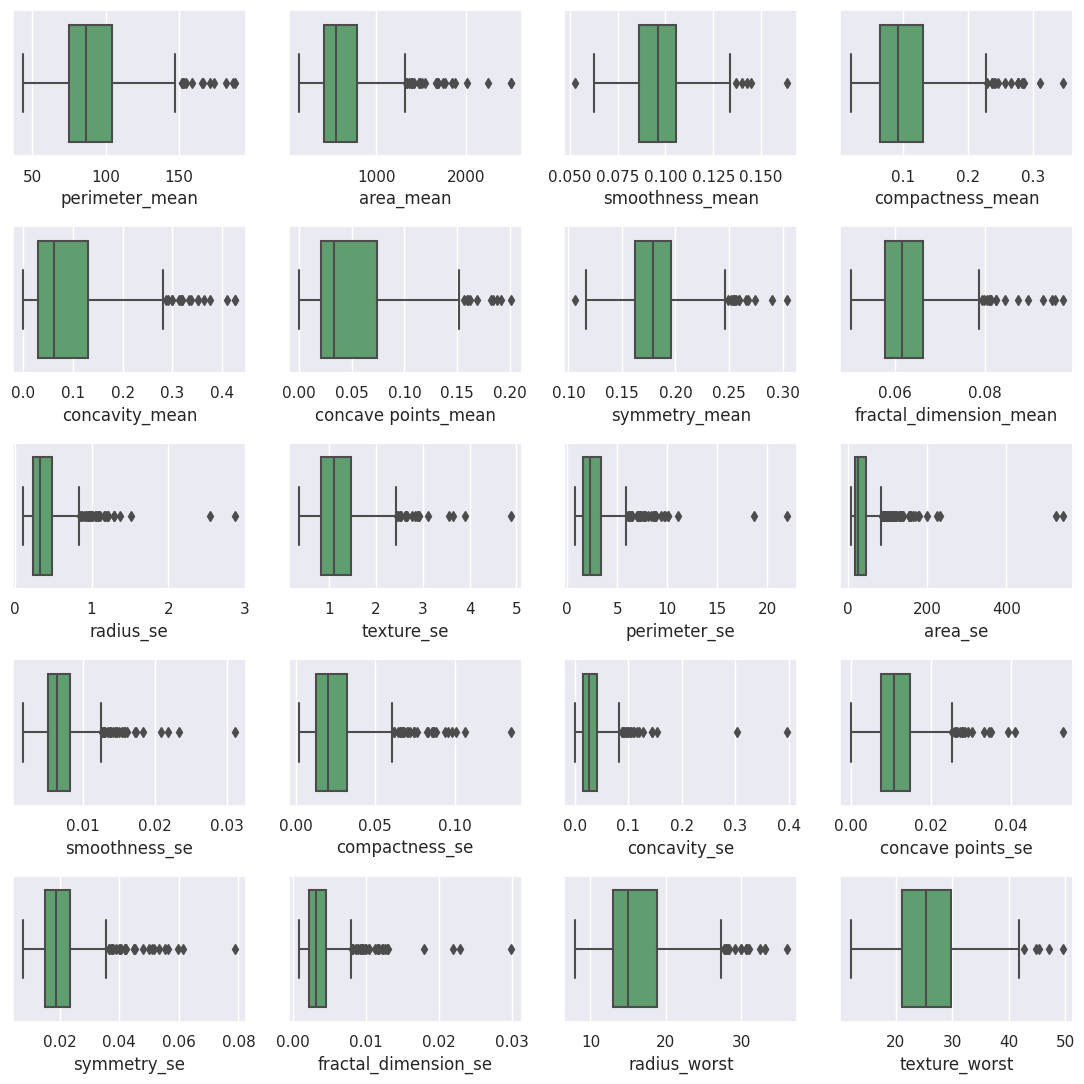

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(11,11))
columns = df.columns[4:24]
for j, i in enumerate(columns, start=1):  ## count columns start with 1   
    plt.subplot(5, 4, j) 
    sns.boxplot(x=df[i], color="g")
plt.tight_layout() # to avoid overlapping charts
plt.show()

<Axes: >

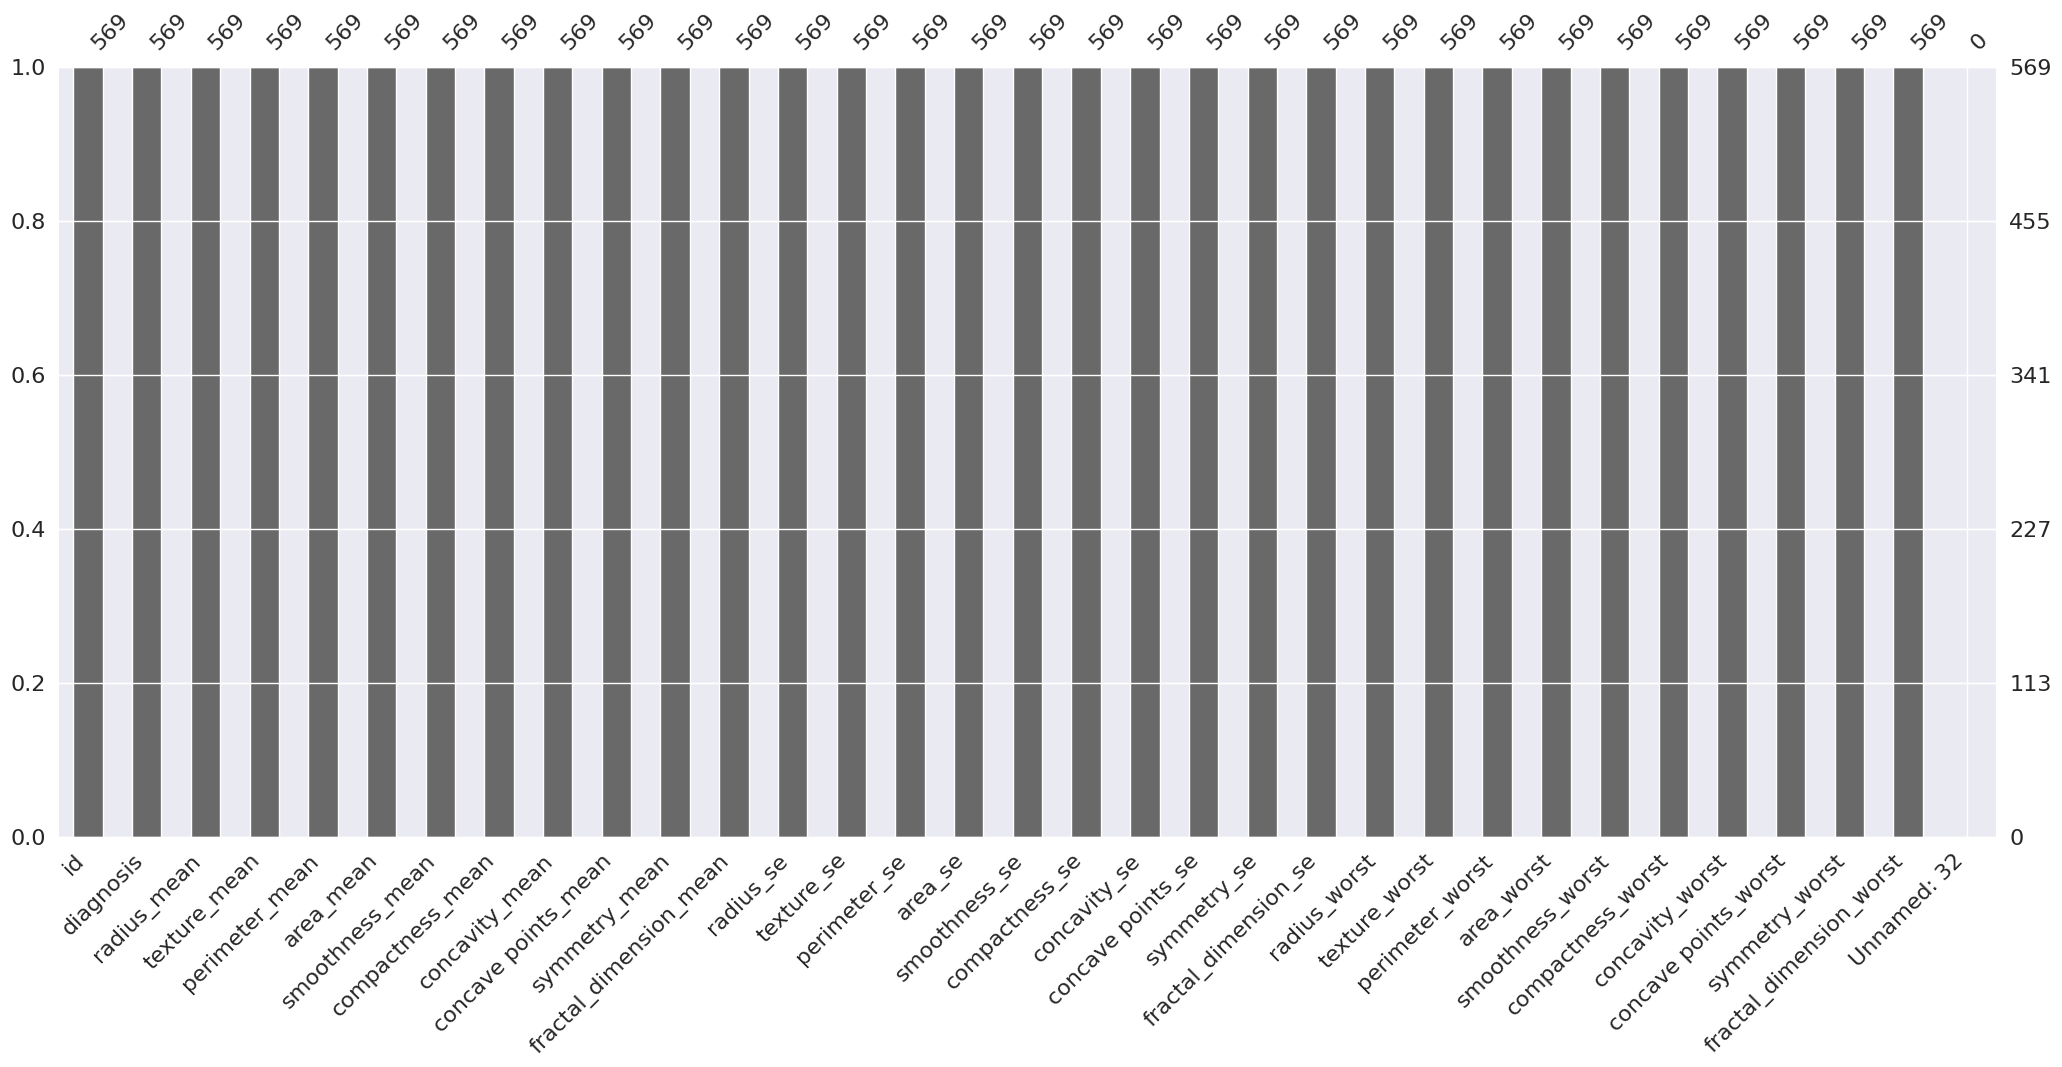

In [36]:
msno.bar(df)

In [37]:
## transform column in dataset to numeric
Encoder=LabelEncoder()
df["diagnosis"]=Encoder.fit_transform(df["diagnosis"])
df["diagnosis"]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [38]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


/tmp/ipykernel_33/1443308084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


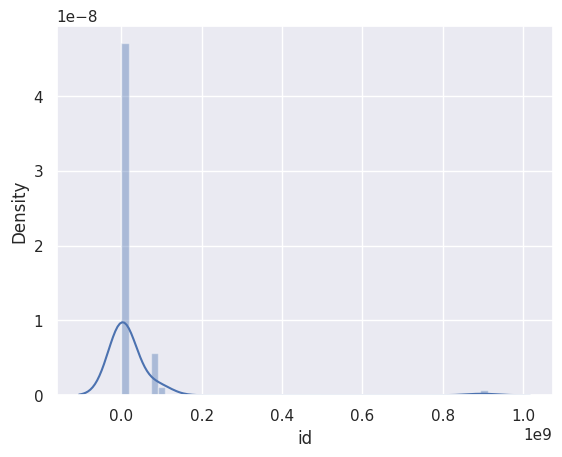

/tmp/ipykernel_33/1443308084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


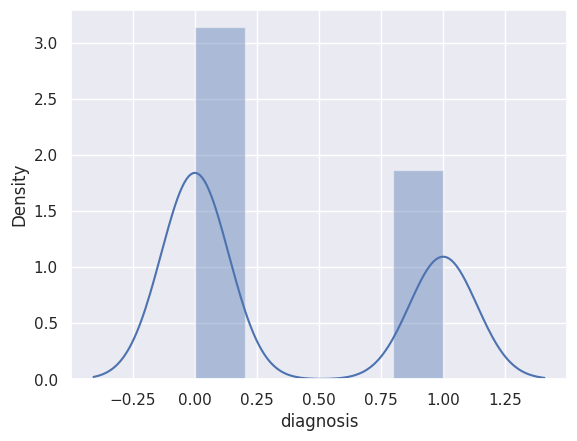

/tmp/ipykernel_33/1443308084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


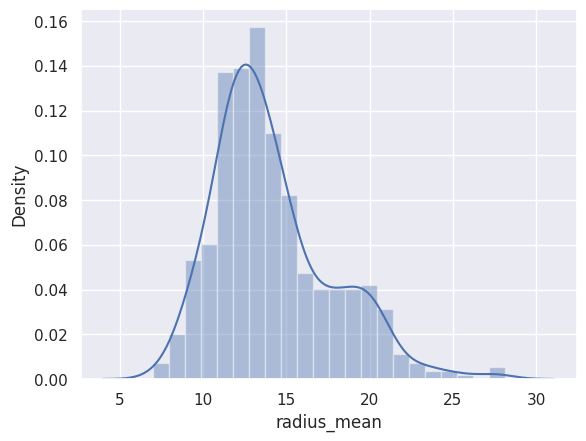

/tmp/ipykernel_33/1443308084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


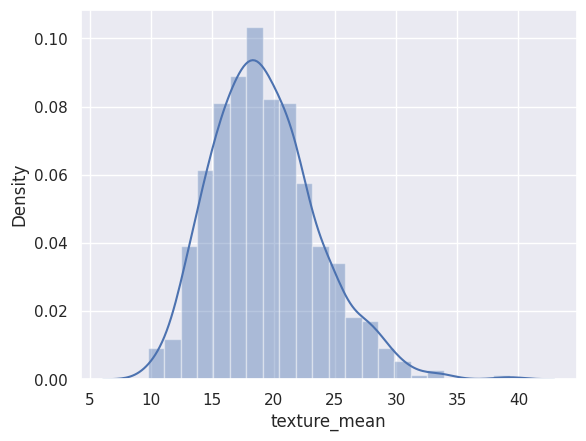

/tmp/ipykernel_33/1443308084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


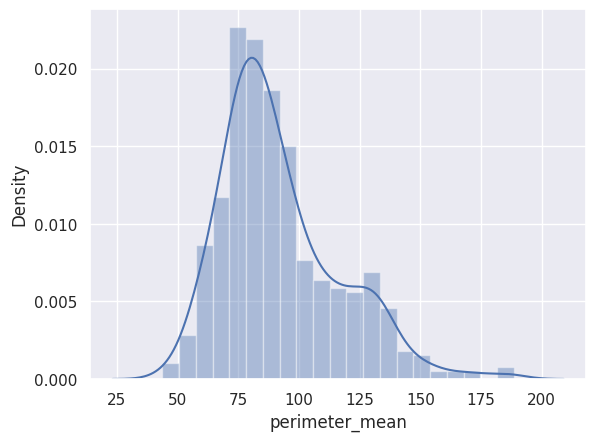

/tmp/ipykernel_33/1443308084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


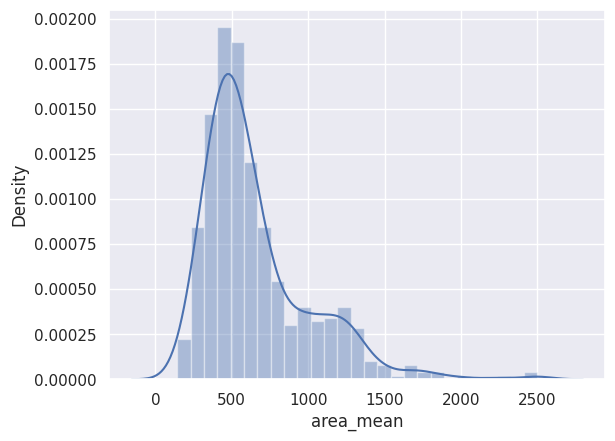

/tmp/ipykernel_33/1443308084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


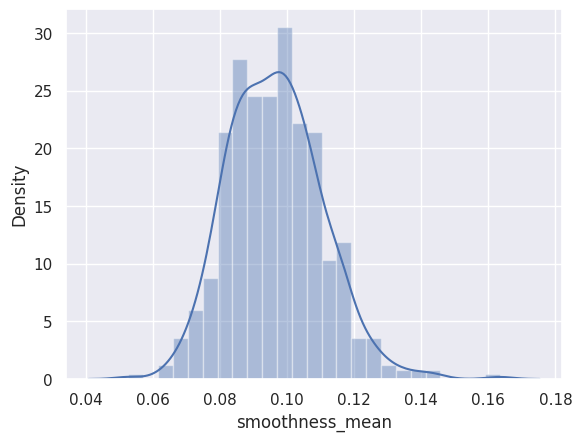

/tmp/ipykernel_33/1443308084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


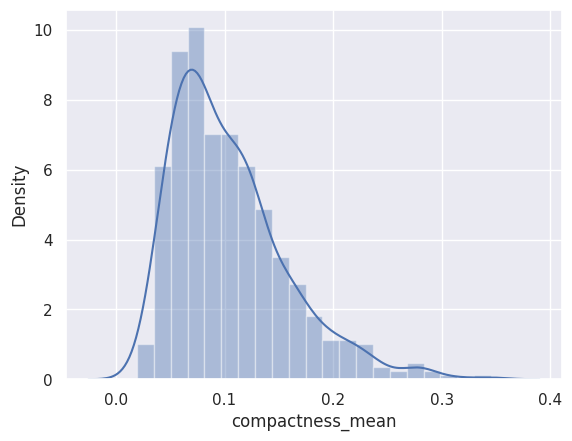

/tmp/ipykernel_33/1443308084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


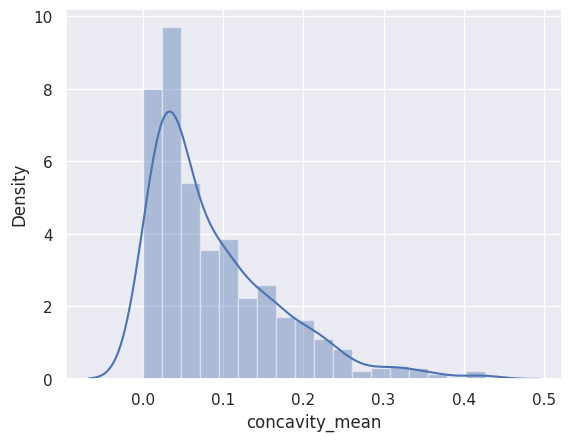

/tmp/ipykernel_33/1443308084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


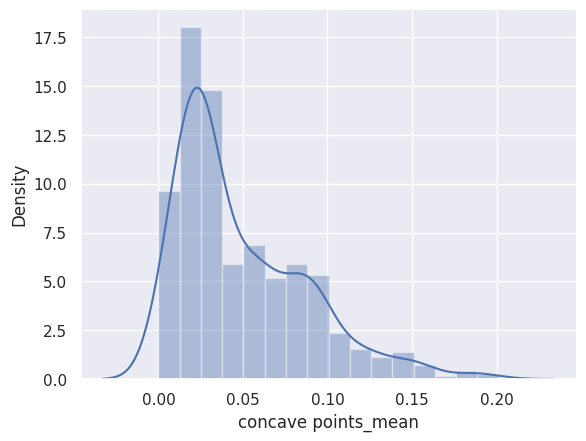

/tmp/ipykernel_33/1443308084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


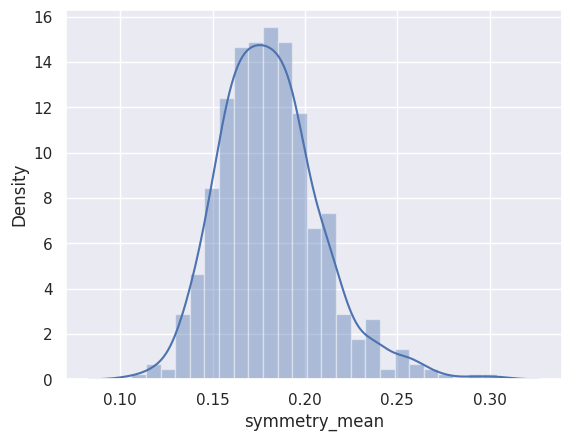

/tmp/ipykernel_33/1443308084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


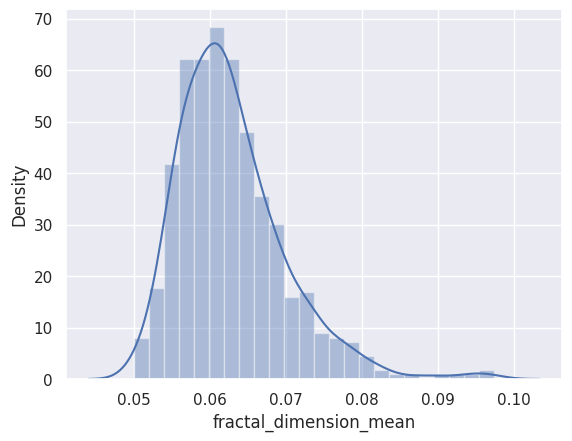

/tmp/ipykernel_33/1443308084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


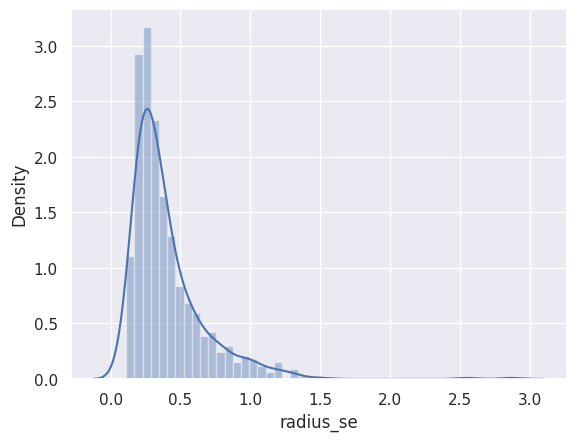

/tmp/ipykernel_33/1443308084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


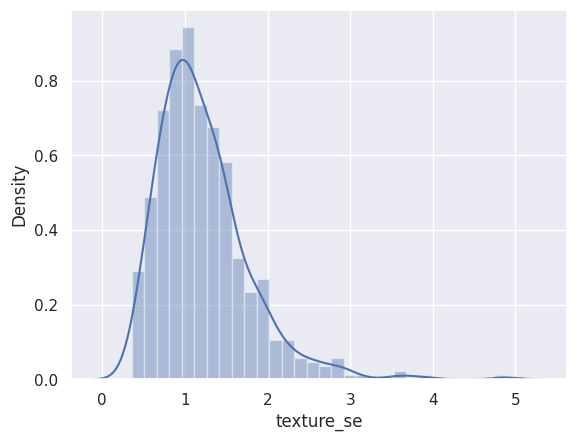

/tmp/ipykernel_33/1443308084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


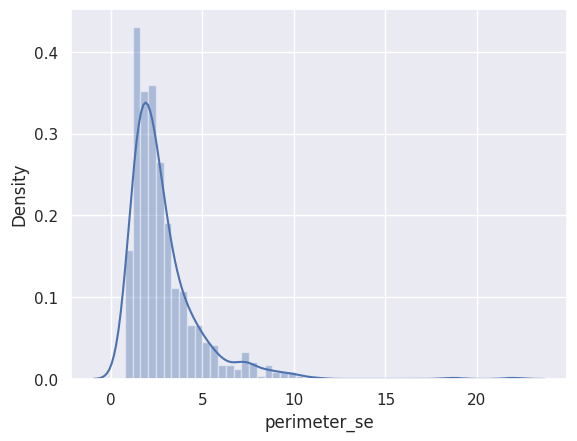

/tmp/ipykernel_33/1443308084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


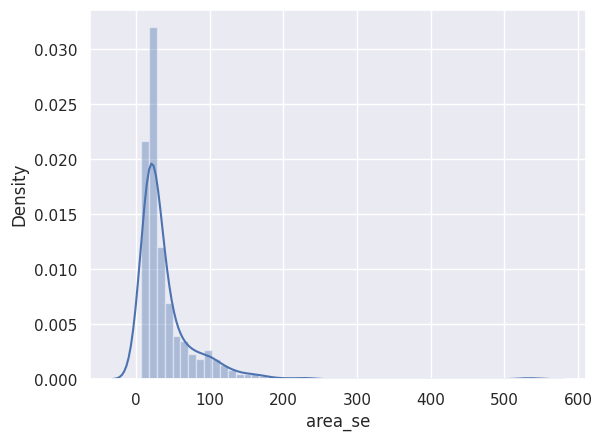

/tmp/ipykernel_33/1443308084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


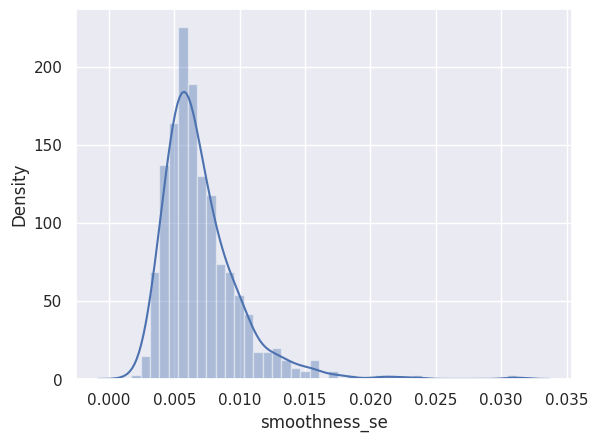

/tmp/ipykernel_33/1443308084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


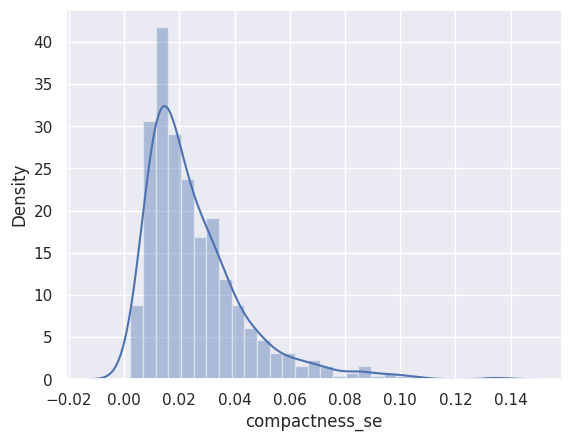

/tmp/ipykernel_33/1443308084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


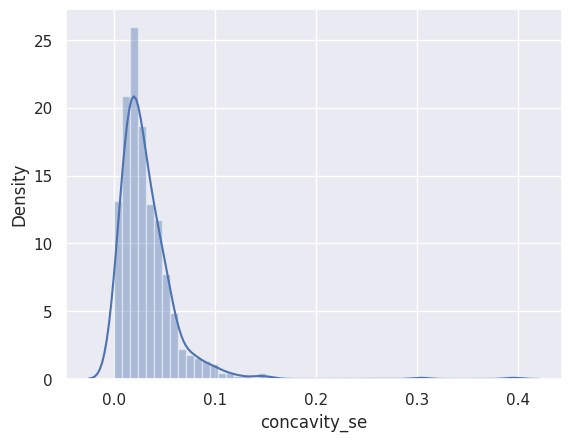

/tmp/ipykernel_33/1443308084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


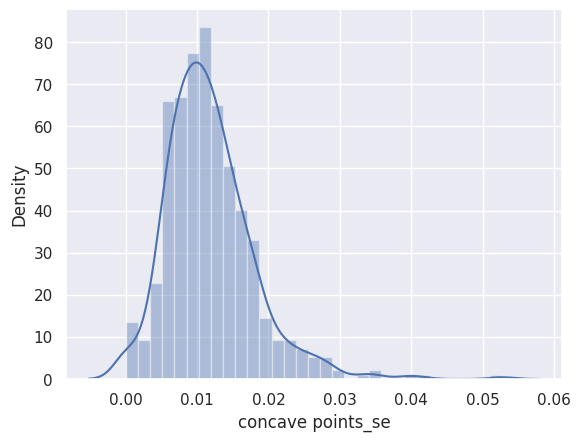

/tmp/ipykernel_33/1443308084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


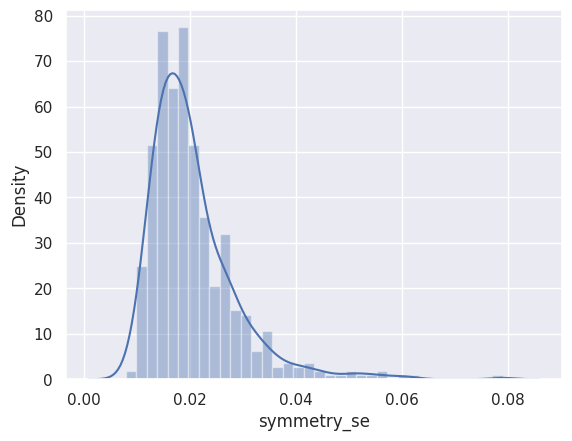

/tmp/ipykernel_33/1443308084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


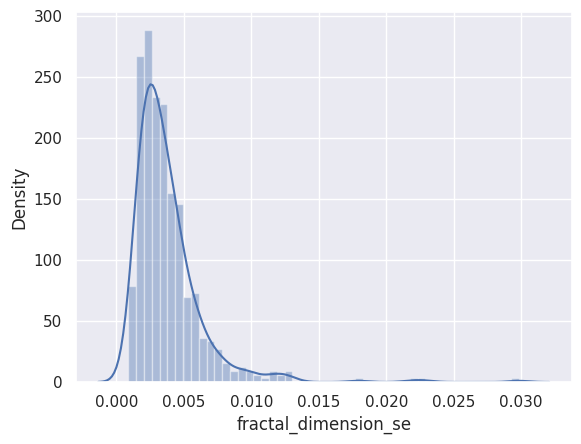

/tmp/ipykernel_33/1443308084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


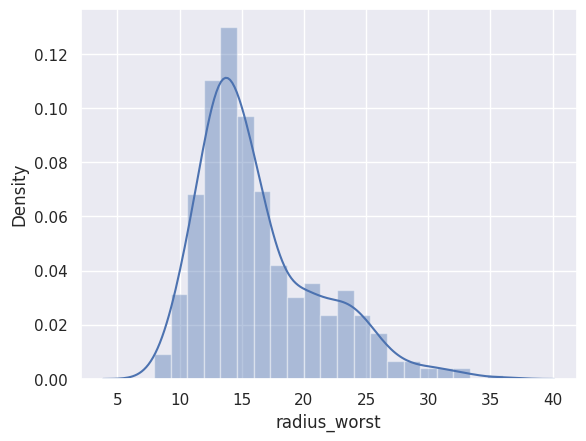

/tmp/ipykernel_33/1443308084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


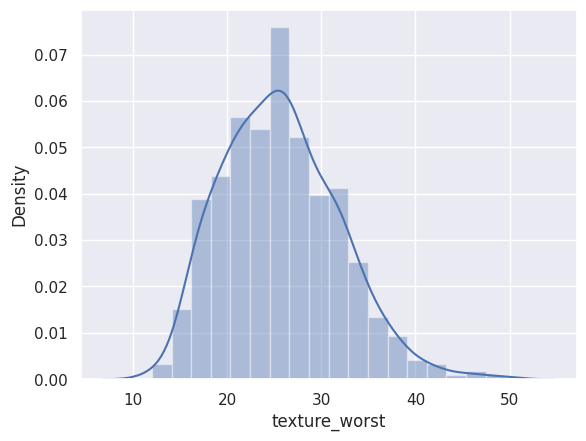

/tmp/ipykernel_33/1443308084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


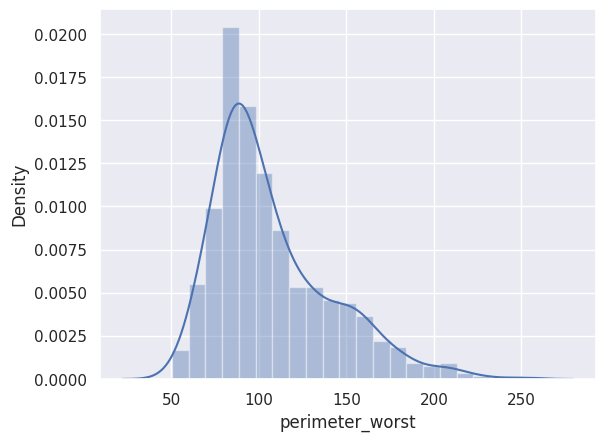

/tmp/ipykernel_33/1443308084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


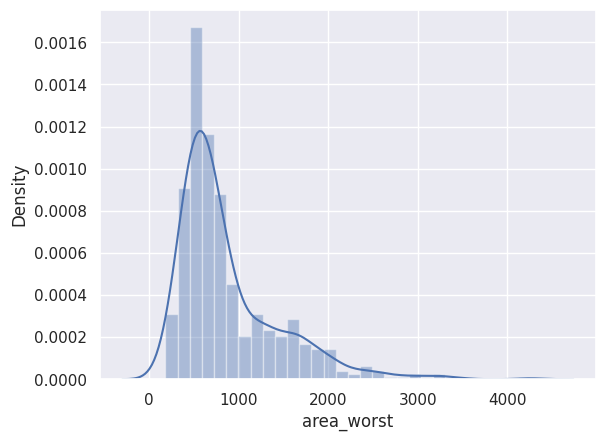

/tmp/ipykernel_33/1443308084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


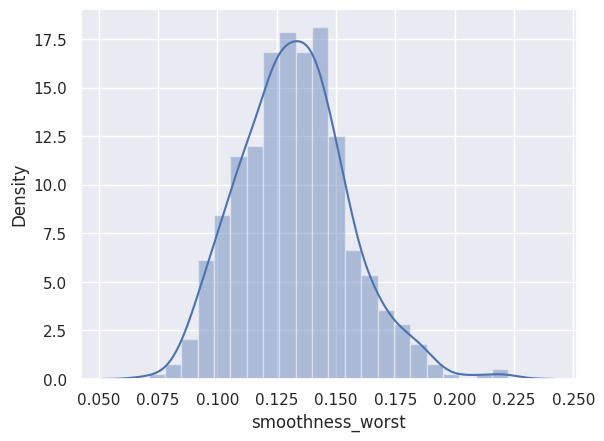

/tmp/ipykernel_33/1443308084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


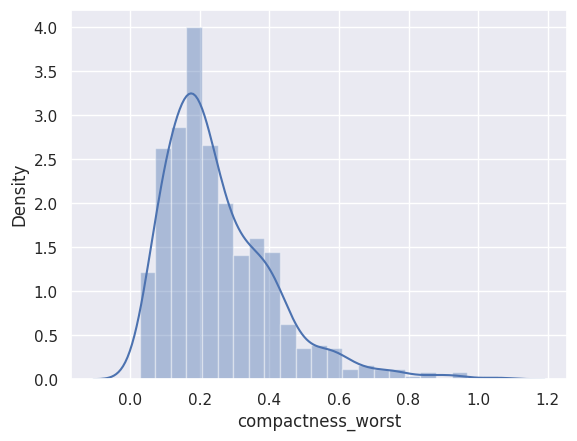

/tmp/ipykernel_33/1443308084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


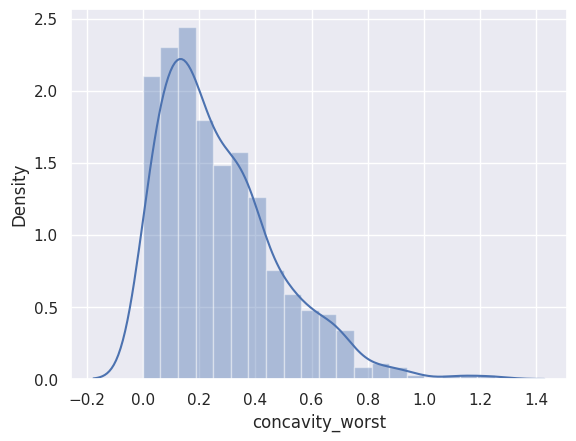

/tmp/ipykernel_33/1443308084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


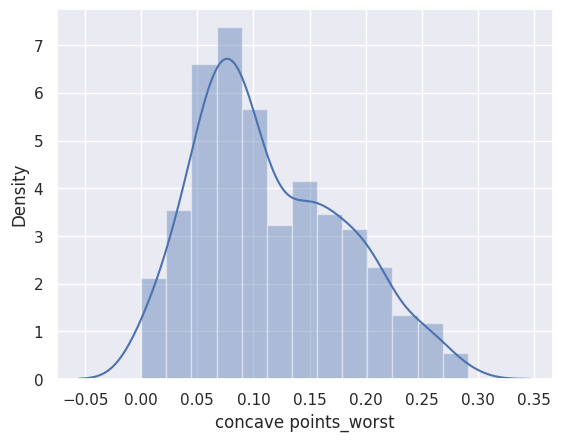

/tmp/ipykernel_33/1443308084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


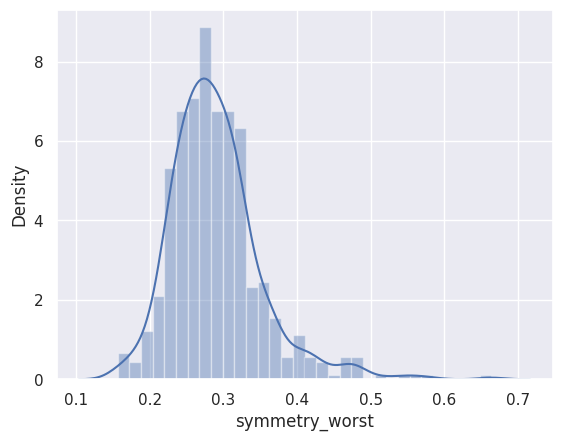

/tmp/ipykernel_33/1443308084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


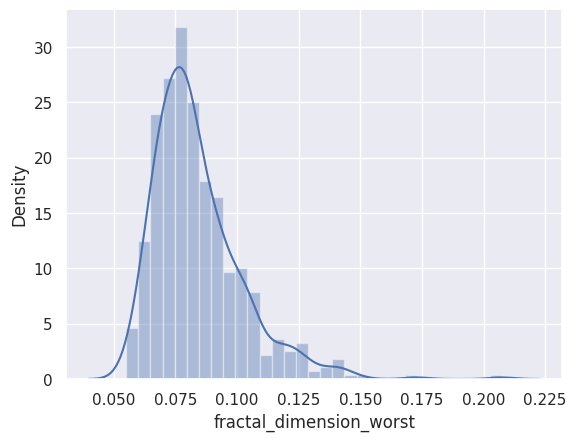

/tmp/ipykernel_33/1443308084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2479: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.10/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


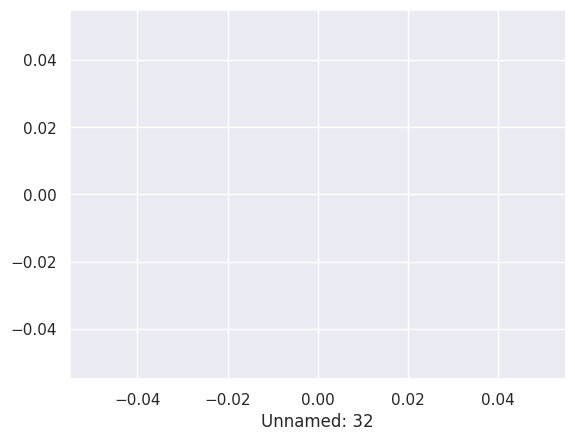

In [39]:
for i in df:
    sns.distplot(df[i])
    plt.show()

In [40]:
fig = px.histogram(df,x="diagnosis",color="diagnosis")
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


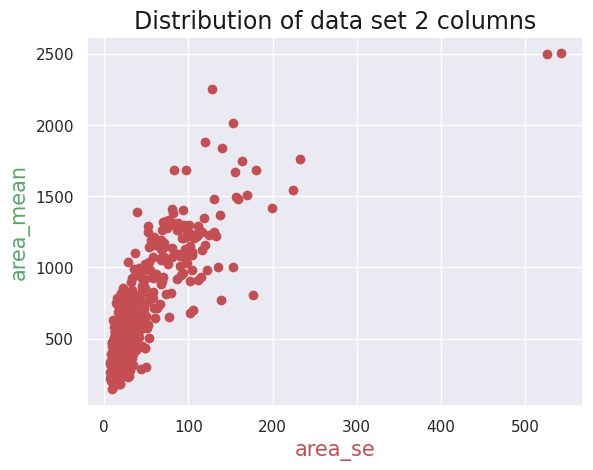

In [41]:
plt.scatter(x=df["area_se"],y=df["area_mean"],c="r")
plt.title("Distribution of data set 2 columns",fontsize=17,c="k")
plt.xlabel("area_se",fontsize=15,c="r")
plt.ylabel("area_mean",fontsize=15,c="g")
plt.show()

<Axes: >

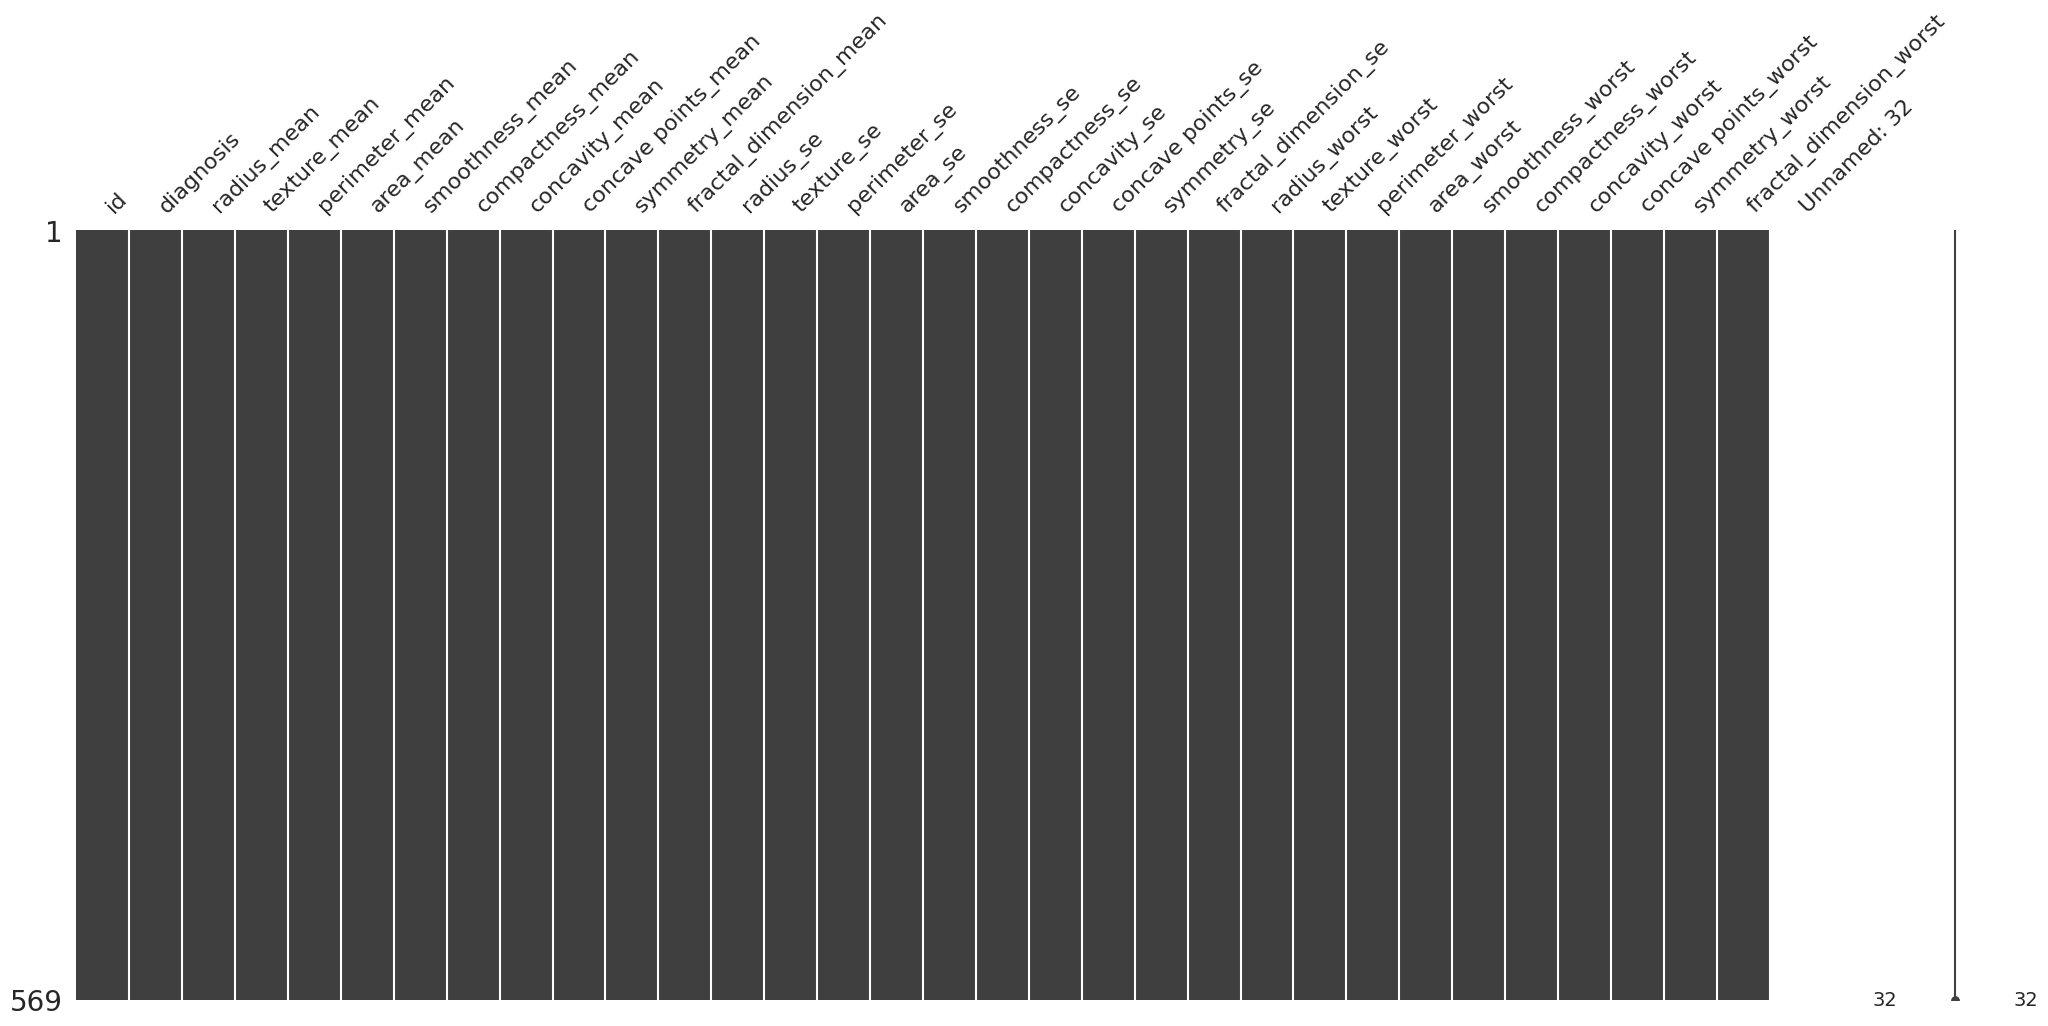

In [42]:
msno.matrix(df)

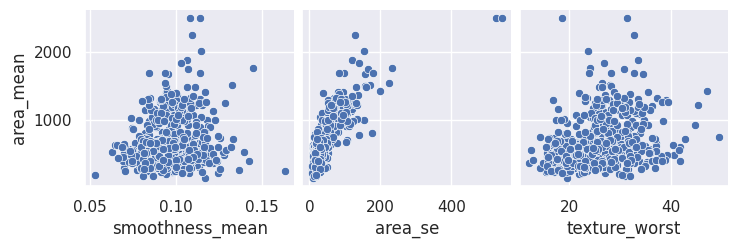

In [43]:
sns.pairplot(data=df,x_vars=["smoothness_mean","area_se","texture_worst"],
             y_vars=["area_mean"])
plt.show()

In [44]:
## feature selection
df=df.drop("Unnamed: 32",axis=1)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [45]:
## split data to x,y
x=df.drop("diagnosis",axis=1)
y=df["diagnosis"]


In [46]:
x

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [47]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,shuffle=True,random_state=42)
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)


x_train shape (483, 31)
x_test shape (86, 31)
y_train shape (483,)
y_test shape (86,)


Models

RandomForestClassifier

In [49]:
rf=RandomForestClassifier(n_estimators=6,max_depth=4,n_jobs=None)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=6)

In [50]:
rf.score(x_train,y_train)

0.979296066252588

In [51]:
y_pred_rf=rf.predict(x_test)
y_pred_rf

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1])

In [52]:
accuracy_rf=accuracy_score(y_test,y_pred_rf)
precision_rf=precision_score(y_test,y_pred_rf)
recall_rf=recall_score(y_test,y_pred_rf)

print(f"accuracy_rf: {accuracy_rf}")
print(f"precision_rf: {precision_rf}")
print(f"recall_rf: {recall_rf}")

cm=confusion_matrix(y_test,y_pred_rf)

accuracy_rf: 0.9534883720930233
precision_rf: 1.0
recall_rf: 0.875


In [53]:
cm

array([[54,  0],
       [ 4, 28]])

<Axes: >

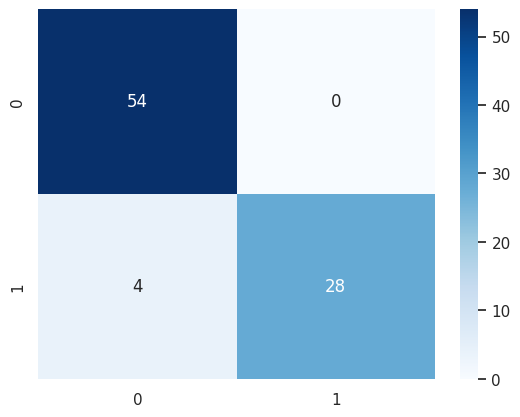

In [54]:
sns.heatmap(cm,annot=True,cmap="Blues")

In [55]:
## Tuning withe GrideSearchCv
parms_test={"n_estimators":[10,20,30,40]
            ,"max_depth":[2,4,6,8]}
grid_search=GridSearchCV(estimator=rf,param_grid=parms_test
                          ,cv=7,n_jobs=-1,return_train_score=True)

In [56]:
grid_search.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.

/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



GridSearchCV(cv=7,
             estimator=RandomForestClassifier(max_depth=4, n_estimators=6),
             n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8],
                         'n_estimators': [10, 20, 30, 40]},
             return_train_score=True)

In [57]:
## get best model hyperparameters
best_model=grid_search.best_estimator_
best_model

RandomForestClassifier(max_depth=8, n_estimators=40)

In [58]:
## get best score
score_best=grid_search.best_score_
print("score after tuning",score_best)

score after tuning 0.9648033126293996


In [59]:
## tuning with RandomizedSearchCV
parms_test={"n_estimators":[10,14,40,50]
            ,"max_depth":[5,8,9,13]}

random_search=RandomizedSearchCV(estimator=rf,param_distributions=parms_test
                                 ,n_iter=7,cv=5,random_state=422,verbose=5)

In [60]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END ......max_depth=5, n_estimators=10;, score=0.948 total time=   0.0s
[CV 2/5] END ......max_depth=5, n_estimators=10;, score=0.938 total time=   0.0s
[CV 3/5] END ......max_depth=5, n_estimators=10;, score=0.938 total time=   0.0s
[CV 4/5] END ......max_depth=5, n_estimators=10;, score=0.958 total time=   0.0s
[CV 5/5] END ......max_depth=5, n_estimators=10;, score=0.958 total time=   0.0s
[CV 1/5] END ......max_depth=9, n_estimators=14;, score=0.959 total time=   0.1s
[CV 2/5] END ......max_depth=9, n_estimators=14;, score=0.959 total time=   0.0s
[CV 3/5] END ......max_depth=9, n_estimators=14;, score=0.948 total time=   0.0s
[CV 4/5] END ......max_depth=9, n_estimators=14;, score=0.958 total time=   0.0s
[CV 5/5] END ......max_depth=9, n_estimators=14;, score=0.948 total time=   0.1s
[CV 1/5] END ......max_depth=9, n_estimators=50;, score=0.979 total time=   0.2s
[CV 2/5] END ......max_depth=9, n_estimators=50;,

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=4,
                                                    n_estimators=6),
                   n_iter=7,
                   param_distributions={'max_depth': [5, 8, 9, 13],
                                        'n_estimators': [10, 14, 40, 50]},
                   random_state=422, verbose=5)

In [61]:
## get best score
score_best=random_search.best_score_
print("score after tuning",score_best)

score after tuning 0.9647551546391753


DecisionTreeClassifier

In [62]:
dt=DecisionTreeClassifier(max_depth=5,random_state=42)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [63]:
dt.score(x_train,y_train)

0.9958592132505176

In [64]:
y_pred_dt=dt.predict(x_test)
y_pred_dt

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1])

In [65]:
accuracy_dt=accuracy_score(y_test,y_pred_dt)
precision_dt=precision_score(y_test,y_pred_dt)
recall_dt=recall_score(y_test,y_pred_dt)

print(f"accuracy_dt: {accuracy_dt}")
print(f"precision_dt: {precision_dt}")
print(f"recall_dt: {recall_dt}")

cm=confusion_matrix(y_test,y_pred_dt)

accuracy_dt: 0.9302325581395349
precision_dt: 0.9333333333333333
recall_dt: 0.875


In [66]:
cm

array([[52,  2],
       [ 4, 28]])

<Axes: >

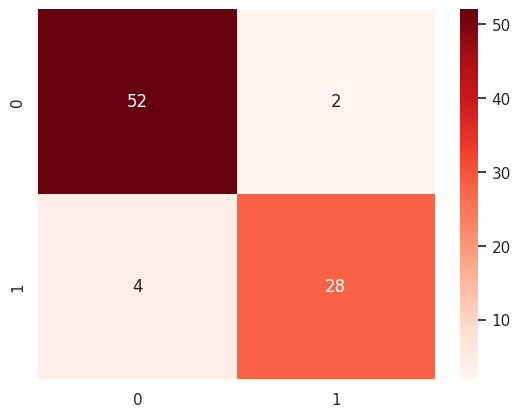

In [67]:
sns.heatmap(cm,annot=True,cmap="Reds")

SVM

In [68]:
sm=SVC(kernel="rbf",C=0.9)
sm.fit(x_train,y_train)

SVC(C=0.9)

In [69]:
sm.score(x_train,y_train)

0.6273291925465838

In [70]:
y_pred_sm=sm.predict(x_test)
y_pred_sm

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [71]:
accuracy_sm=accuracy_score(y_test,y_pred_sm)
precision_sm=precision_score(y_test,y_pred_sm)
recall_sm=recall_score(y_test,y_pred_sm)

print(f"accuracy_sm:{accuracy_sm}")
print(f"precision_sm:{precision_sm}")
print(f"recall_sm:{recall_sm}")

accuracy_sm:0.627906976744186
precision_sm:0.0
recall_sm:0.0


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



LogisticRegression

In [72]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [73]:
lg.score(x_train,y_train)

0.6273291925465838

In [74]:
y_pred_lg=lg.predict(x_test)
y_pred_lg

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [75]:
accuracy_lg=accuracy_score(y_test,y_pred_lg)
cm=confusion_matrix(y_test,y_pred_lg)

print(f"accuracy_lg:{accuracy_lg}")


accuracy_lg:0.627906976744186


In [76]:
cm

array([[54,  0],
       [32,  0]])

<Axes: >

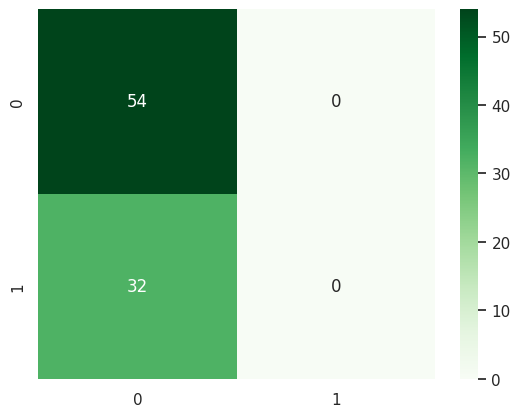

In [77]:
sns.heatmap(cm,annot=True,cmap="Greens")

XGboost

In [78]:
xg=xgb.XGBClassifier(n_estimators=4)
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=4, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [79]:
xg.score(x_train,y_train)

0.9875776397515528

In [80]:
y_pred_xg=xg.predict(x_test)
y_pred_xg

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1])

In [81]:
accuracy_xg=accuracy_score(y_test,y_pred_xg)
precision_xg=precision_score(y_test,y_pred_xg)
recall_xg=recall_score(y_test,y_pred_xg)

print(f"accuracy_xg:{accuracy_xg}")
print(f"precision_xg:{precision_xg}")
print(f"recall_xg:{recall_xg}")

accuracy_xg:0.9651162790697675
precision_xg:1.0
recall_xg:0.90625


In [82]:
cm=confusion_matrix(y_test,y_pred_xg)
cm

array([[54,  0],
       [ 3, 29]])

<Axes: >

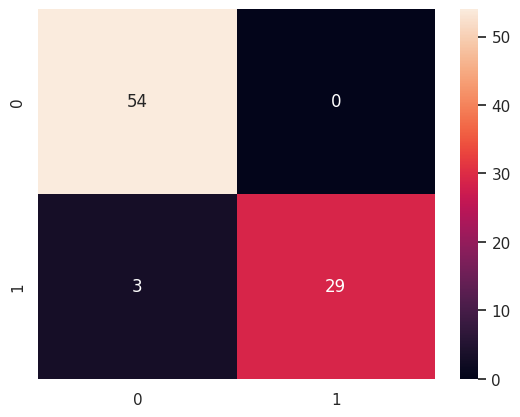

In [83]:
sns.heatmap(cm,annot=True)

ANN

In [84]:
model=Sequential()
model.add(Dense(100,activation="relu",input_shape=(x_train.shape[1],)))
model.add(Dense(150,activation="relu"))
model.add(Dense(160,activation="relu"))
model.add(Dense(1))

summary=model.summary()

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

model.fit(x_train,y_train,epochs=50)

loss , accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", accuracy)







/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 150)            │        15,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 160)            │        24,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,671 (166.68 KB)

 Trainable params: 42,671 (166.68 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/losses/losses.py:22: SyntaxWarning:

In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.



16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6076 - loss: 4.6781e-08
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6378 - loss: 4.3177e-08 
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6376 - loss: 4.3205e-08 
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6052 - loss: 4.7064e-08 
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6269 - loss: 4.4478e-08 
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6289 - loss: 4.4239e-08 
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6566 - loss: 4.0932e-08 
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6303 - loss: 4.4077e-08 
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6443 - loss: 4.2404e-08 
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6203 - loss: 4.5260e-08 
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6223 - loss: 4.5023e-08 
Epoch 12/50
16/16 ━━━━━━━━━━━━━

/opt/conda/lib/python3.10/site-packages/keras/src/losses/losses.py:22: SyntaxWarning:

In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.

